# Bank Customer Transaction Prediction

- Dataset: https://www.kaggle.com/c/santander-value-prediction-challenge/data

## 1. Load libs and data

In [151]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [152]:
# Importing the dataset
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')

## 2. Overview

### Training Set

In [153]:
print(train.info())
print("Rows and columns of training dataset:", train.shape)
# Check first 5 rows
print("First 5 rows of train dataset:\n", train.head(5))
# Check for missing values, only display columns with missing values
print("Columns with missing values:", train.columns[train.isnull().any()])

# Detect columns that contain all zero values
all_zero_columns_train = [col for col in train.columns if (train[col] == 0).all()]

print("Number of columns with all zero values:", len(all_zero_columns_train))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Columns: 4993 entries, ID to 9fc776466
dtypes: float64(1845), int64(3147), object(1)
memory usage: 169.9+ MB
None
Rows and columns of training dataset: (4459, 4993)
First 5 rows of train dataset:
           ID      target  48df886f9  0deb4b6a8  34b15f335  a8cb14b00  \
0  000d6aaf2  38000000.0        0.0          0        0.0          0   
1  000fbd867    600000.0        0.0          0        0.0          0   
2  0027d6b71  10000000.0        0.0          0        0.0          0   
3  0028cbf45   2000000.0        0.0          0        0.0          0   
4  002a68644  14400000.0        0.0          0        0.0          0   

   2f0771a37  30347e683  d08d1fbe3  6ee66e115  ...  3ecc09859  9281abeea  \
0          0          0          0          0  ...        0.0        0.0   
1          0          0          0          0  ...        0.0        0.0   
2          0          0          0          0  ...        0.0       

### Test Set

In [154]:
print(test.info())
print("Rows and columns of test dataset:", test.shape)
# Check first 5 rows
print("First 5 rows of test dataset:\n", test.head(5))
# Check for missing values, only display columns with missing values
print("Columns with missing values:", test.columns[test.isnull().any()])

# Detect columns that contain all zero values
all_zero_columns_test = [col for col in test.columns if (test[col] == 0).all()]

print("Number of columns with all zero values:", len(all_zero_columns_test))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49342 entries, 0 to 49341
Columns: 4992 entries, ID to 9fc776466
dtypes: float64(4991), object(1)
memory usage: 1.8+ GB
None
Rows and columns of test dataset: (49342, 4992)
First 5 rows of test dataset:
           ID  48df886f9  0deb4b6a8  34b15f335  a8cb14b00  2f0771a37  \
0  000137c73        0.0        0.0        0.0        0.0        0.0   
1  00021489f        0.0        0.0        0.0        0.0        0.0   
2  0004d7953        0.0        0.0        0.0        0.0        0.0   
3  00056a333        0.0        0.0        0.0        0.0        0.0   
4  00056d8eb        0.0        0.0        0.0        0.0        0.0   

   30347e683  d08d1fbe3  6ee66e115  20aa07010  ...  3ecc09859  9281abeea  \
0        0.0        0.0        0.0        0.0  ...        0.0        0.0   
1        0.0        0.0        0.0        0.0  ...        0.0        0.0   
2        0.0        0.0        0.0        0.0  ...        0.0        0.0   
3        0.0   

## 3. Feature Visualization

### Check the distribution of target

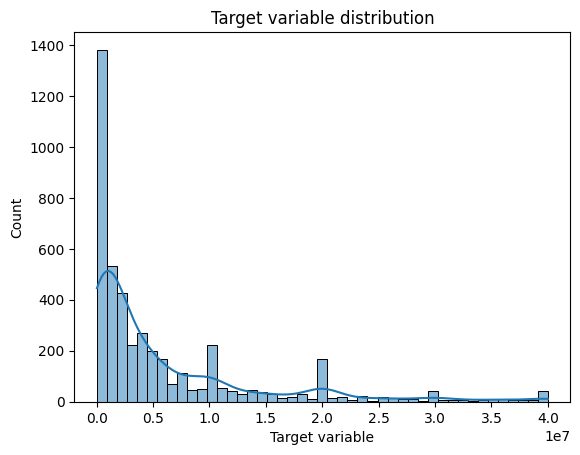

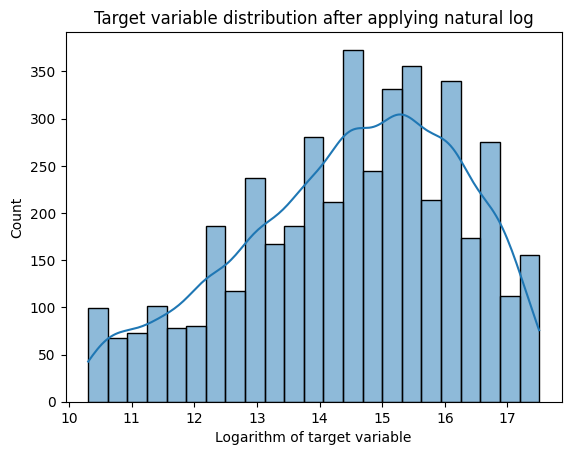

In [155]:
# Visualize features to define the key features
# Split target and features
X = train.drop(['ID', 'target'], axis=1)
y = train['target']

# Target variable distribution use seaborn
sns.histplot(y, kde=True)
plt.xlabel('Target variable')
plt.title('Target variable distribution')
plt.show()

# Apply nature log to target variable
y = np.log1p(y)
sns.histplot(y, kde=True)
plt.xlabel('Logarithm of target variable')
plt.title('Target variable distribution after applying natural log')
plt.show()


### Check the correlation

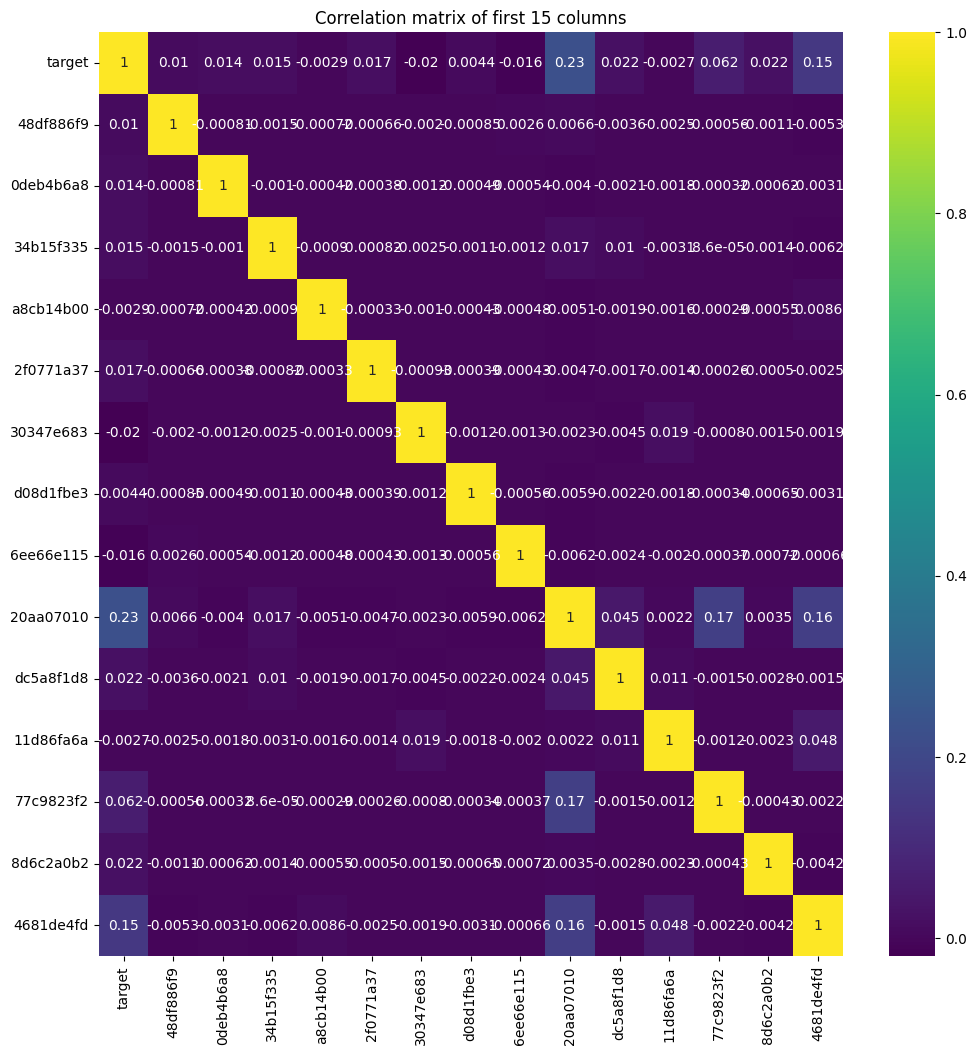

In [156]:
# Remove non-numeric columns from train dataframe
numeric_train = train.select_dtypes(include=[np.number])

# Calculate correlation matrix for first 15 columns
correlation_matrix = numeric_train.iloc[:, :15].corr()

# Plot correlation matrix with light color
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation matrix of first 15 columns')
plt.show()

## 4. Feature Engineering

In [157]:
train.head()

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [158]:
# Handle constant features
# Remove columns with all zero values
train = train.drop(all_zero_columns_train, axis=1)

print("Rows and columns of training dataset after removing constant columns:", train.shape)

Rows and columns of training dataset after removing constant columns: (4459, 4737)


In [159]:
train.head()

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [160]:
# Handle duplicate features
# Remove duplicate columns
train = train.T.drop_duplicates().T

print("Rows and columns of training dataset after removing duplicate columns:", train.shape)

Rows and columns of training dataset after removing duplicate columns: (4459, 4732)


In [161]:
train.head()

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [162]:
# Check non numeric columns
non_numeric_columns = train.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_columns)

# Head of non-numeric columns
print("Head of non-numeric columns:", train[non_numeric_columns].head())

# Convert string values to numeric values in 'train' dataframe
train_in_numeric = train.apply(pd.to_numeric, errors='coerce')

# Calculate correlation with target variable except target variable
correlation = train_in_numeric.corr()['target'].abs().sort_values(ascending=False)

# Select top 5 features for visualization
top_5_features = correlation[1:6]
print("Top 5 features:", top_5_features)

Non-numeric columns: Index(['ID', 'target', '48df886f9', '0deb4b6a8', '34b15f335', 'a8cb14b00',
       '2f0771a37', '30347e683', 'd08d1fbe3', '6ee66e115',
       ...
       '3ecc09859', '9281abeea', '8675bec0b', '3a13ed79a', 'f677d4d13',
       '71b203550', '137efaa80', 'fb36b89d9', '7e293fbaf', '9fc776466'],
      dtype='object', length=4732)
Head of non-numeric columns:           ID      target 48df886f9 0deb4b6a8 34b15f335 a8cb14b00 2f0771a37  \
0  000d6aaf2  38000000.0       0.0         0       0.0         0         0   
1  000fbd867    600000.0       0.0         0       0.0         0         0   
2  0027d6b71  10000000.0       0.0         0       0.0         0         0   
3  0028cbf45   2000000.0       0.0         0       0.0         0         0   
4  002a68644  14400000.0       0.0         0       0.0         0         0   

  30347e683 d08d1fbe3 6ee66e115  ... 3ecc09859 9281abeea 8675bec0b 3a13ed79a  \
0         0         0         0  ...       0.0       0.0       0.0         0

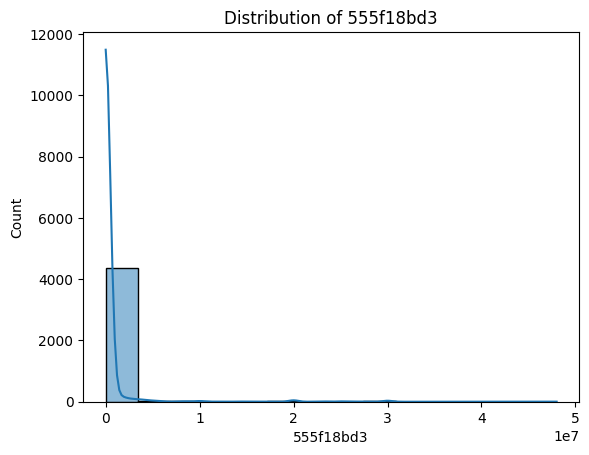

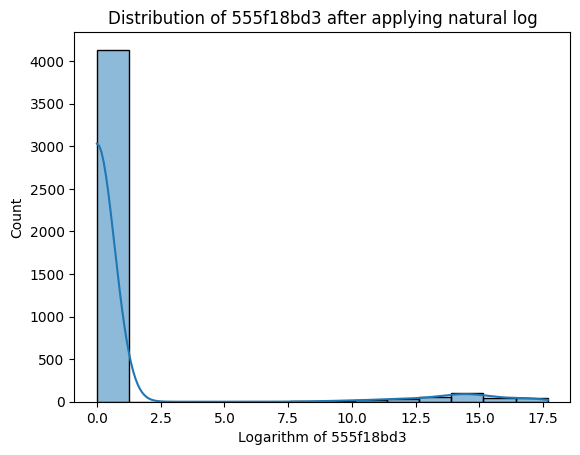

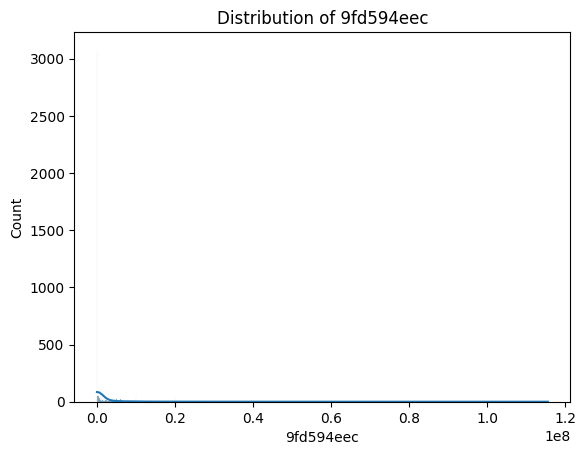

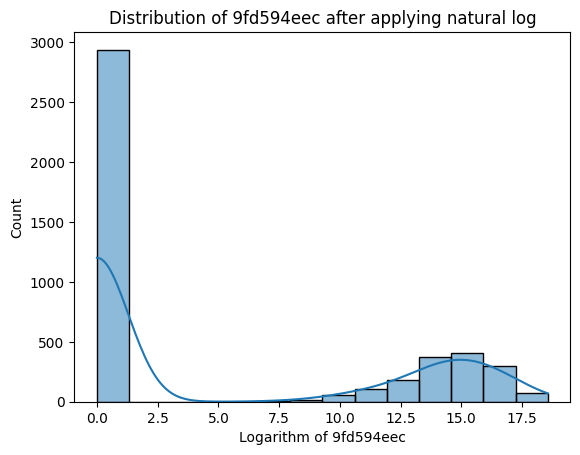

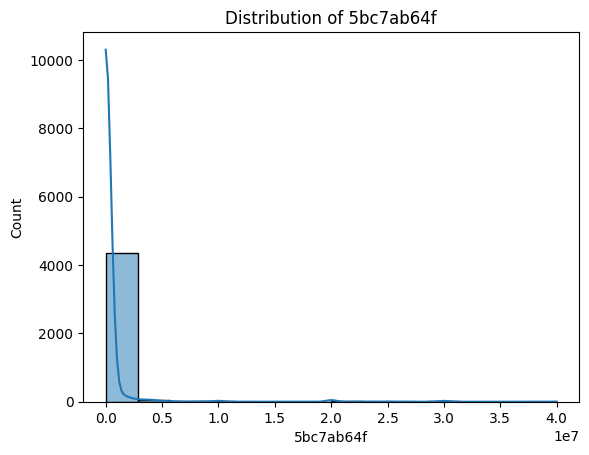

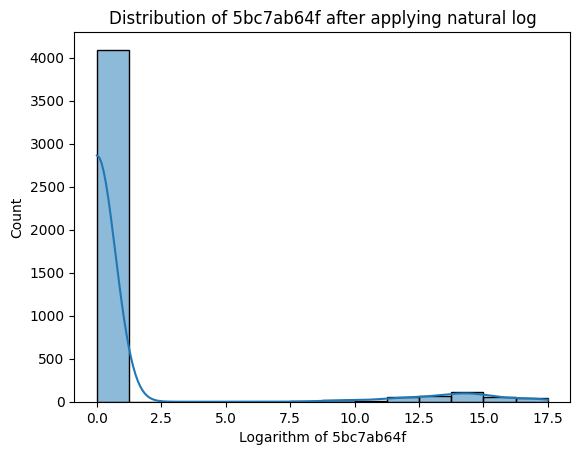

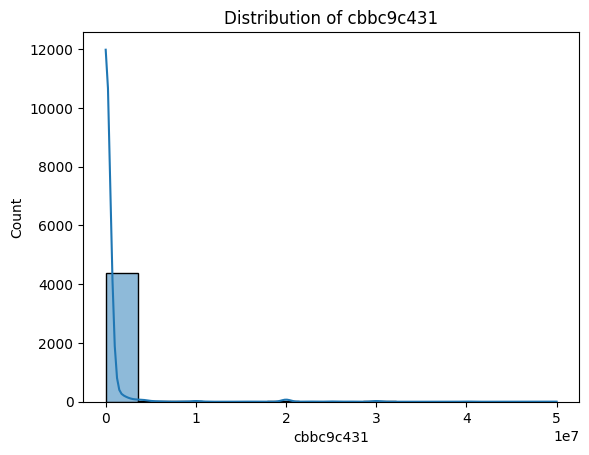

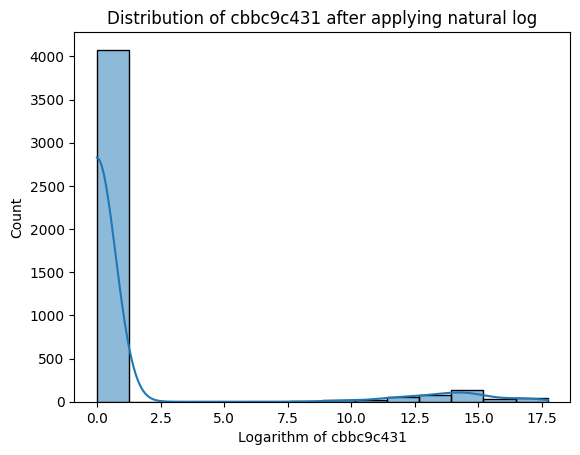

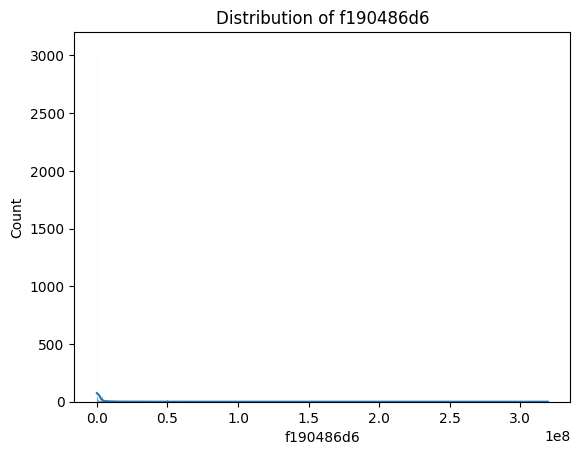

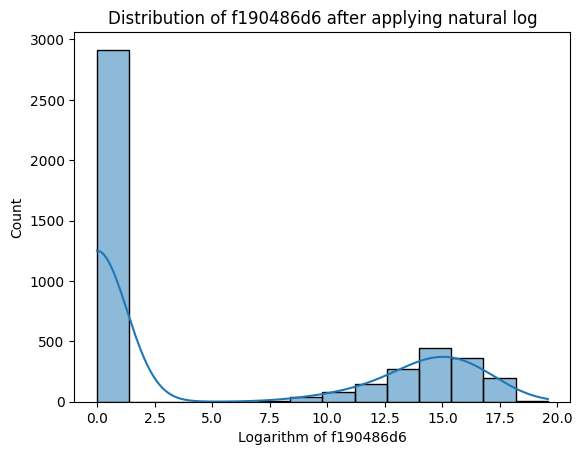

In [163]:
# Visualize top 5 features
for feature in top_5_features.index:
  sns.histplot(train[feature], kde=True)
  plt.xlabel(feature)
  plt.title('Distribution of ' + feature)
  plt.show()

  # Apply natural log to feature
  feature_processed = np.log1p(train_in_numeric[feature])
  sns.histplot(feature_processed, kde=True)
  plt.xlabel('Logarithm of ' + feature)
  plt.title('Distribution of ' + feature + ' after applying natural log')
  plt.show()

### Plot Mutual Information between Features and Target

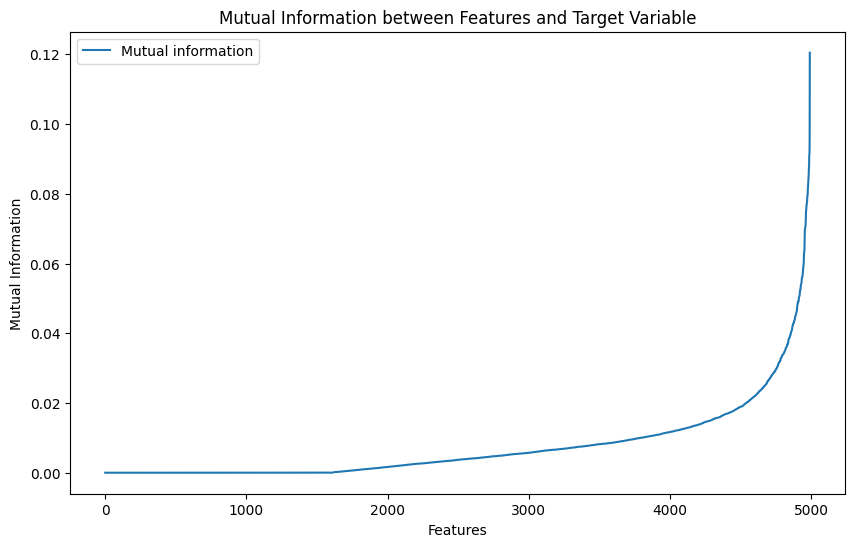

In [164]:
# Plot mutual information between features and target variable
from sklearn.feature_selection import mutual_info_regression

# Calculate mutual information
mi = mutual_info_regression(X, y)

# Sort mutual information in ascending order
sorted_mi = np.sort(mi)
sorted_indices = np.argsort(mi)

# Plot the mutual information
plt.figure(figsize=(10, 6))
plt.plot(sorted_mi, label='Mutual information')
plt.xlabel('Features')
plt.ylabel('Mutual Information')
plt.title('Mutual Information between Features and Target Variable')
plt.legend()
plt.show()

### Prepare data for model training

In [165]:
train.head()

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [166]:
# Select top 101 features for training, include the target variable and 100 features
top_101_features = correlation.head(101)

# Extract top 101 features from 'train' dataframe
top_101_features_data = train[top_101_features.index]

# Check if all columns are numeric
print("All columns are numeric:", top_101_features_data.select_dtypes(include=[np.number]).shape[1] == top_101_features_data.shape[1])

All columns are numeric: False


In [167]:
top_101_features_data.head()

,target,555f18bd3,9fd594eec,5bc7ab64f,cbbc9c431,f190486d6,6b119d8ce,f74e8f13d,ac30af84a,26fc93eb7,...,8781e4b91,491b9ee45,db3839ab0,4ecc3f505,c47340d97,d47c58fe2,dda820122,f9847e9fe,097c7841e,68a945b18
0,38000000.0,0.0,600000.0,0.0,0.0,1866666.66,0.0,1733333.34,0.0,3205000.0,...,1266666.66,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
1,600000.0,0.0,1800000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
2,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
3,2000000.0,0.0,0.0,0.0,0.0,2000000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
4,14400000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8000000.0,0.0,0,0.0,0.0,0.0


## 5. Build Model

In [168]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from xgboost import XGBRegressor


In [169]:
top_101_features_data.head()

,target,555f18bd3,9fd594eec,5bc7ab64f,cbbc9c431,f190486d6,6b119d8ce,f74e8f13d,ac30af84a,26fc93eb7,...,8781e4b91,491b9ee45,db3839ab0,4ecc3f505,c47340d97,d47c58fe2,dda820122,f9847e9fe,097c7841e,68a945b18
0,38000000.0,0.0,600000.0,0.0,0.0,1866666.66,0.0,1733333.34,0.0,3205000.0,...,1266666.66,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
1,600000.0,0.0,1800000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
2,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
3,2000000.0,0.0,0.0,0.0,0.0,2000000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
4,14400000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8000000.0,0.0,0,0.0,0.0,0.0


In [172]:
# Split data into training and testing sets
X = top_101_features_data.drop('target', axis=1)
y = np.log1p(top_101_features_data['target'].astype(float))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [173]:

numeric_transformer = Pipeline(steps=[
  ('poly', PolynomialFeatures(degree=2, include_bias=False)),
  ('scaler', StandardScaler())
])

preprocessor = numeric_transformer

model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)

pipeline = Pipeline(steps=[
  ('preprocessor', preprocessor),
  ('model', model)
])

### Perform Hyperprameter Tuning

In [174]:
param_grid = {
  'model__n_estimators': [100, 200, 500],
  'model__learning_rate': [0.1, 0.01],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=4, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
print("Test score:", grid_search.score(X_test, y_test))

/home/dogrod/developer/UVIC/ECE572/.env/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters: {'model__learning_rate': 0.01, 'model__n_estimators': 500}
Best score: -2.221286482679881
Test score: -2.1393966884930804


## 6. Evaluate the model

RMSE: 1.4626676616692804
R-squared: 0.256471695805342
MAE: 1.1696028011494675


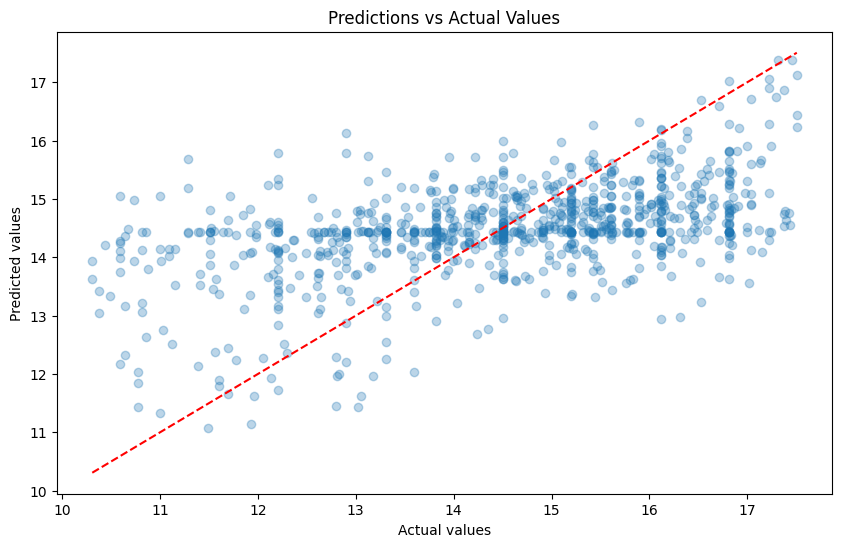

In [180]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Best Model
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("RMSE:", rmse)
print("R-squared:", r2)
print("MAE:", mae)

# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Predictions vs Actual Values')
plt.show()